In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

C:\Users\likhi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
class Linear_Regression():
    
    def __init__(self,learning_rate,no_of_iterations):
        
        self.learning_rate= learning_rate
        self.no_of_iterations=no_of_iterations
    
    def fit(self,X,Y):
        
        self.m,self.n= X.shape
        self.w= np.zeros(self.n)
        self.b= 0
        self.X=X
        self.Y=Y
        
        for i in range(self.no_of_iterations):
            self.update_weights()
    
    def update_weights(self):
        Y_pred = self.predict(self.X)
        
        dw= -(2*(self.X.T).dot(self.Y - Y_pred))/self.m
        db= -2*np.sum(self.Y- Y_pred)/ self.m
        self.w = self.w- self.learning_rate*dw
        self.b = self.b- self.learning_rate*db
        
    def predict(self, X):
        return X.dot(self.w)+self.b
        

In [3]:
df= pd.read_csv('salary_data.csv')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
X= df.iloc[:,:-1].values
Y= df.iloc[:,-1].values

In [7]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [8]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [9]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.3, random_state=2)

In [10]:
print(X_train)

[[ 6.8]
 [ 2.9]
 [ 9.6]
 [ 4. ]
 [ 2.2]
 [ 3.9]
 [ 5.1]
 [10.3]
 [ 9. ]
 [ 5.3]
 [ 1.5]
 [ 3.2]
 [ 9.5]
 [ 8.7]
 [ 5.9]
 [ 4. ]
 [ 7.9]
 [10.5]
 [ 4.1]
 [ 4.9]
 [ 3.2]]


In [11]:
print(X_test)

[[1.3]
 [1.1]
 [4.5]
 [3.7]
 [7.1]
 [6. ]
 [8.2]
 [3. ]
 [2. ]]


In [13]:
model = Linear_Regression(learning_rate=0.01, no_of_iterations=1000)

In [14]:
model.fit(X_train,Y_train)

In [15]:
print('w value is :',model.w[0])
print('b is :' ,model.b)

w value is : 9613.82807150452
b is : 23173.61056081348


In [16]:
y_pred= model.predict(X_test)

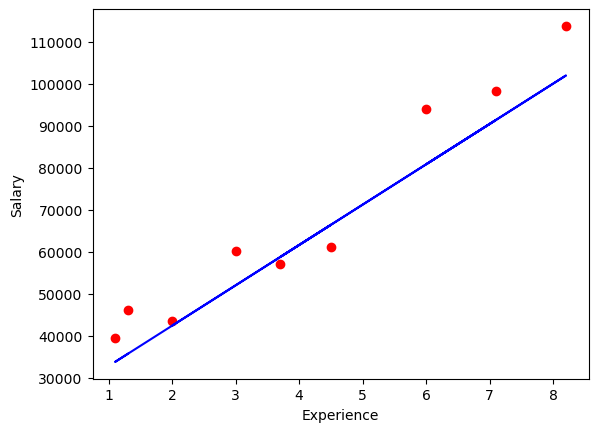

In [17]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,y_pred,color='blue')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()